In [21]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler

In [ ]:
# loading the dataset
dataset = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
dataset.head()

In [ ]:
# Checking for any null values or missing values in the dataset
dataset.isnull().sum()

In [ ]:
# Checking what are the different possible values for the dependent variable y
dataset['DEATH_EVENT'].unique()

In [68]:
### splitting the dataset into dependent and independent features

# X = independent features = storing all features excluding the last one i.e DEATH_EVENT
X = dataset.iloc[:,:-1]
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,4
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,6
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,7
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,7
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0,0.004848,1,0.363636,1,0.157474,0.067416,0.857143,1,1,270
295,0.272727,0,0.229268,0,0.363636,0,0.296884,0.078652,0.742857,0,0,271
296,0.090909,0,0.259888,1,0.696970,0,0.869075,0.033708,0.714286,0,0,278
297,0.090909,0,0.304925,0,0.363636,0,0.139290,0.101124,0.771429,1,1,280


In [ ]:
# y =  storing only the last feature --> DEATH_EVENT
y = dataset.iloc[:,-1]
y

In [ ]:
# EDA
# sns.pairplot(dataset , hue = 'DEATH_EVENT')

**VISUALIZATION**

In [ ]:

numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
plt.figure(figsize=(15, 10))

# Density plot for each continuous feature
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(dataset[col], shade=True, color="blue", bw_adjust=0.5)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
features = ['age','ejection_fraction']

for feature in features:

    surv = dataset[dataset["DEATH_EVENT"] == 0][feature]
    not_surv = dataset[dataset["DEATH_EVENT"] == 1][feature]


    hist_data = [surv, not_surv]
    group_labels = ['Survived', 'Not Survived']


    fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)


    fig.update_layout(
        title_text=f"Distribution of {feature} based on Survival Status",
        xaxis_title=feature,
        yaxis_title="Density",
        template='plotly_white'
    )


    fig.show()

In [ ]:
dataset.hist(figsize=(15, 12), bins=20 , color = 'green')
plt.suptitle('Feature Distributions')
plt.show()

In [ ]:
subset_features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']

sns.pairplot(dataset[subset_features], hue='DEATH_EVENT', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairwise Relationships (colored by DEATH_EVENT)', y=1.02)
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(subset_features[:-1], 1):  # Exclude the target itself
    plt.subplot(2, 3, i)
    sns.boxplot(x='DEATH_EVENT', y=col, data=dataset, palette='coolwarm')
    plt.title(f'{col} by DEATH_EVENT')

plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = dataset.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
correlation_target = dataset.corr()['DEATH_EVENT'].drop('DEATH_EVENT')
print("Correlation of features with DEATH_EVENT:")
print(correlation_target)

plt.figure(figsize=(10, 6))
correlation_target.plot(kind='bar', color='blue')
plt.title('Correlation of Features with DEATH_EVENT')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='gray', linewidth=0.8, ls='--')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DEATH_EVENT', data=dataset, palette='coolwarm')
plt.title('Count of DEATH_EVENT (0 = Survived, 1 = Deceased)')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Deceased'])
plt.show()

In [ ]:
!pip install lifelines

In [ ]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(dataset['time'], event_observed=dataset['DEATH_EVENT'])
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

**NORMALIZATION**

In [ ]:
# normalization
from sklearn.preprocessing import MinMaxScaler

# Data Normalization for numerical features
scaler = MinMaxScaler()

# Apply MinMaxScaler to numerical columns
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])
print("Data after normalization:")
print(dataset.head())

***USING LOGISTIC REGRESSION***

In [42]:
# //// USING LOGISTIC REGRESSION ////
from sklearn.linear_model import LogisticRegression
classifier  = LogisticRegression()

In [8]:
#  test_size = 0.33 ---> using 33% of the data for testing and the remaing 67% for training
#  random_state = 42 ---> we can use any number, but generally 42 is used. It controls the randomness to ensure the results are the same every time we run the code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [10]:
# GridSearch = algorithm that finds the best model by trying every possible combination of hyperparameters
from sklearn.model_selection import GridSearchCV
parameters = {'penalty' : ['l1','l2','elasticnet'], 'C' : [1,2,3,4,5,6,10,20,30,40,50], 'max_iter':[100,200,300,400,500]}

In [11]:
classifier_Regressor = GridSearchCV(classifier,param_grid = parameters,scoring='accuracy',cv = 5 )

In [ ]:
classifier_Regressor.fit(X_train,y_train)

In [13]:
print(classifier_Regressor.best_params_)

{'C': 10, 'max_iter': 200, 'penalty': 'l2'}


In [ ]:
print(classifier_Regressor.best_score_)

In [ ]:
# prediction
y_pred = classifier_Regressor.predict(X_test)
y_pred

In [71]:
# accuracy
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred, y_test)
print(score)

0.8333333333333334


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.85      0.58      0.69        19

    accuracy                           0.83        60
   macro avg       0.84      0.77      0.79        60
weighted avg       0.83      0.83      0.82        60



In [76]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  2],
       [ 8, 11]])

In [73]:
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
specificity

0.9512195121951219

<Axes: >

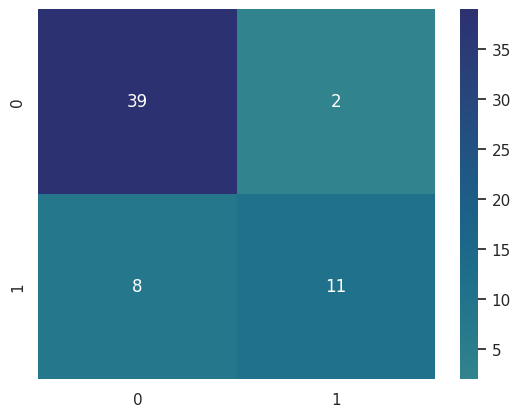

In [77]:
#  visualization
# plot the confusion matrix using seaborn library
sns.heatmap(cm, vmin=None, vmax=None, cmap="crest", center=True , annot=True, fmt='.2g')

*USING SUPPORT VECTOR MACHINE*

In [ ]:
# svm
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

In [ ]:
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

In [38]:
# Create a new SVM classifier with the best parameters
svm_best_model = SVC(
    C=1.0,
    kernel='linear',
    random_state=42
)

In [ ]:
# Fit the new model to the training data
svm_best_model.fit(X_train, y_train)

In [ ]:
# Fit the new model to the training data
svm_best_model.fit(X_train, y_train)

Confusion Matrix:
[[40  1]
 [10  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        41
           1       0.90      0.47      0.62        19

    accuracy                           0.82        60
   macro avg       0.85      0.72      0.75        60
weighted avg       0.83      0.82      0.80        60

Accuracy: 0.82

Specificity : 
0.9512195121951219


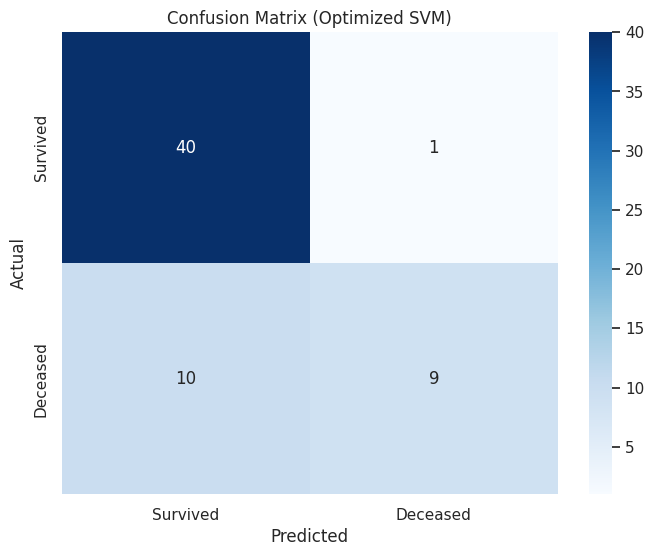

In [75]:
y_pred_best = svm_best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
print("\nSpecificity : ")
print(specificity)

# visualization

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Survived', 'Deceased'], yticklabels=['Survived', 'Deceased'])
plt.title('Confusion Matrix (Optimized SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

*USING DECISION TREE*

In [44]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()


In [ ]:
#Training the decision tree classifier.
clf.fit(X_train,y_train)

In [47]:
#Predicting labels on the test set.
y_pred = clf.predict(X_test)

In [ ]:
#max depth and minSample split prevents overfitting

model1 =DecisionTreeClassifier(min_samples_split=10)
model1.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [53]:
from graphviz import Source
from sklearn import tree

feature_names = dataset.columns.tolist()
feature_names.remove('DEATH_EVENT')

In [ ]:
dot_data = tree.export_graphviz(model1, feature_names=feature_names, filled=True,
                                class_names=['0', '1'], out_file=None)
graph = Source(dot_data)
graph.render("First_tree", view=True)

In [ ]:
# evaluating the model
plt.figure(figsize=(20,10))
tree.plot_tree(model1, feature_names=X.columns, class_names=['0', '1'], filled=True)  # Use 'model1' and correct class names
plt.title("Decision Tree Visualization")
plt.show()

ROC curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probability predictions
y_pred_proba = classifier_Regressor.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_proba)))

# Diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
